**Task 1: Performing Exploratory Data Analysis and Extracting the Top 5 Business Insights**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
customer_data = pd.read_csv('C:\\Users\\palla\\Desktop\\Zeotap_intern\\Datasets\\Customers.csv')
Product_data = pd.read_csv('C:\\Users\\palla\\Desktop\\Zeotap_intern\\Datasets\\Products.csv') 
Transactions_data = pd.read_csv('C:\\Users\\palla\\Desktop\\Zeotap_intern\\Datasets\\Transactions.csv')

In [7]:
customer_data.shape, Product_data.shape, Transactions_data.shape

((200, 4), (100, 4), (1000, 7))

In [17]:
Transactions_data.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [18]:
Product_data.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [19]:
customer_data.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [11]:
customer_data.isna().sum(), Product_data.isna().sum(), Transactions_data.isna().sum()
#No null values in the datasets

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

In [25]:
customer_data.info(), Product_data.info(), Transactions_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None, None, None)

In [24]:
#Descriptive statistics of the datasets
customer_data.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [15]:
Product_data.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [16]:
Transactions_data.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [26]:
# Checking for How many unique category of products in the Products dataset and from customer dataset analysing the region of the customers
Product_data['Category'].value_counts(), customer_data['Region'].value_counts()

(Category
 Books          26
 Electronics    26
 Clothing       25
 Home Decor     23
 Name: count, dtype: int64,
 Region
 South America    59
 Europe           50
 North America    46
 Asia             45
 Name: count, dtype: int64)

In [39]:
# Converting date columns to datetime for analysis 
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
Transactions_data['TransactionDate'] = pd.to_datetime(Transactions_data['TransactionDate'])

# Merging datasets to enrich transaction data with customer and product details
transactions_merged = Transactions_data.merge(customer_data, on='CustomerID', how='left').merge(Product_data, on='ProductID', how='left')
transactions_merged.shape


(1000, 13)

In [38]:
transactions_merged.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,Anna Ball,South America,2022-05-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,Jeremy Mclaughlin,South America,2024-09-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,David Li,North America,2024-01-13,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,Miguel Wong,North America,2024-01-30,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,Robert Jones,South America,2023-04-19,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
# Checking the descriptive stats after merging the datasets
transactions_merged.describe()

,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


In [30]:
#Checking for class Imbalance in the provided datasets

# 1. Checking Distribution of customers by region
customer_region_dist = customer_data['Region'].value_counts(normalize=True) * 100

# 2. Checking Distribution of products by category
product_category_dist = Product_data['Category'].value_counts(normalize=True) * 100

# 3. Checking Distribution of transactions
# a) Quantity distribution
quantity_dist = transactions_merged['Quantity'].value_counts(normalize=True) * 100

# b) Customer transactions distribution
customer_transaction_dist = transactions_merged['CustomerID'].value_counts(normalize=True) * 100

# c) Product transactions distribution 
product_transaction_dist = transactions_merged['ProductID'].value_counts(normalize=True) * 100

In [50]:
# Displaying the results
print("Customer Region Distribution (%):\n", customer_region_dist)

Customer Region Distribution (%):
 Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64


In [51]:
print("\nProduct Category Distribution (%):\n", product_category_dist)



Product Category Distribution (%):
 Category
Books          26.0
Electronics    26.0
Clothing       25.0
Home Decor     23.0
Name: proportion, dtype: float64


In [52]:
print("\nTop 5 Quantity Distribution (%):\n", quantity_dist.head())



Top 5 Quantity Distribution (%):
 Quantity
4    26.1
3    25.4
2    24.6
1    23.9
Name: proportion, dtype: float64


In [53]:
print("\nTop 5 Customer Transactions (%):\n", customer_transaction_dist.head())



Top 5 Customer Transactions (%):
 CustomerID
C0109    1.1
C0156    1.1
C0141    1.0
C0175    1.0
C0065    1.0
Name: proportion, dtype: float64


In [54]:
print("\nTop 5 Product Transactions (%):\n", product_transaction_dist.head())



Top 5 Product Transactions (%):
 ProductID
P059    1.9
P029    1.7
P062    1.6
P079    1.6
P054    1.6
Name: proportion, dtype: float64


In [57]:
# Customer region distribution - check for dominant regions
dominant_region = customer_region_dist.idxmax()
dominant_region_percentage = customer_region_dist.max()

# Product category distribution - check for dominant categories
dominant_category = product_category_dist.idxmax()
dominant_category_percentage = product_category_dist.max()

# Quantity distribution - check the most frequent quantities purchased
dominant_quantity = quantity_dist.idxmax()
dominant_quantity_percentage = quantity_dist.max()

# Customer transactions - check if a small number of customers account for most transactions
top_customer = customer_transaction_dist.idxmax()
top_customer_percentage = customer_transaction_dist.max()

# Product transactions - check if a small number of products dominate transactions
top_product = product_transaction_dist.idxmax()
top_product_percentage = product_transaction_dist.max()

# Summary of findings
imbalance_summary = {
    "Dominant Region": {"Region": dominant_region, "Percentage": dominant_region_percentage},
    "Dominant Category": {"Category": dominant_category, "Percentage": dominant_category_percentage},
    "Most Frequent Quantity Purchased": {"Quantity": dominant_quantity, "Percentage": dominant_quantity_percentage},
    "Top Customer Contribution": {"CustomerID": top_customer, "Percentage": top_customer_percentage},
    "Top Product Contribution": {"ProductID": top_product, "Percentage": top_product_percentage},
}

imbalance_summary


{'Dominant Region': {'Region': 'South America', 'Percentage': 29.5},
 'Dominant Category': {'Category': 'Books', 'Percentage': 26.0},
 'Most Frequent Quantity Purchased': {'Quantity': 4, 'Percentage': 26.1},
 'Top Customer Contribution': {'CustomerID': 'C0109',
  'Percentage': 1.0999999999999999},
 'Top Product Contribution': {'ProductID': 'P059', 'Percentage': 1.9}}

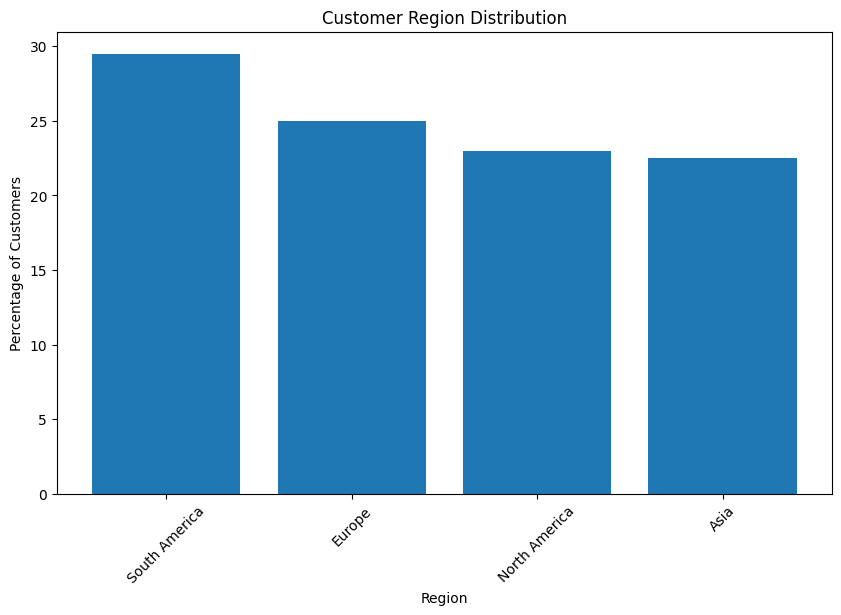

In [32]:
#Visualizing the distributions for better understanding
# Visualizing Customer Region Distribution
plt.figure(figsize=(10, 6))
plt.bar(customer_region_dist.index, customer_region_dist)
plt.xlabel("Region")
plt.ylabel("Percentage of Customers")
plt.title("Customer Region Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


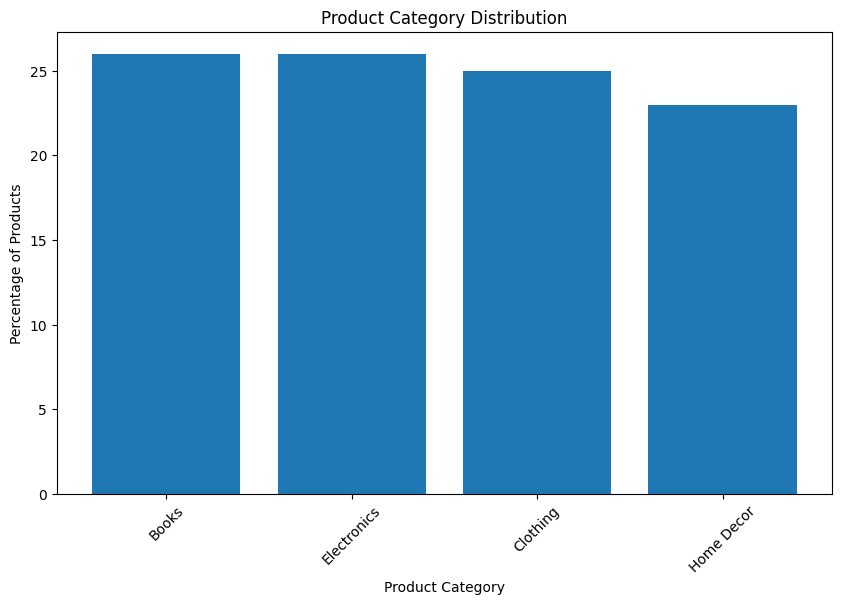

In [33]:
# Visualizing Product Category Distribution
plt.figure(figsize=(10, 6))
plt.bar(product_category_dist.index, product_category_dist)
plt.xlabel("Product Category")
plt.ylabel("Percentage of Products")
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()


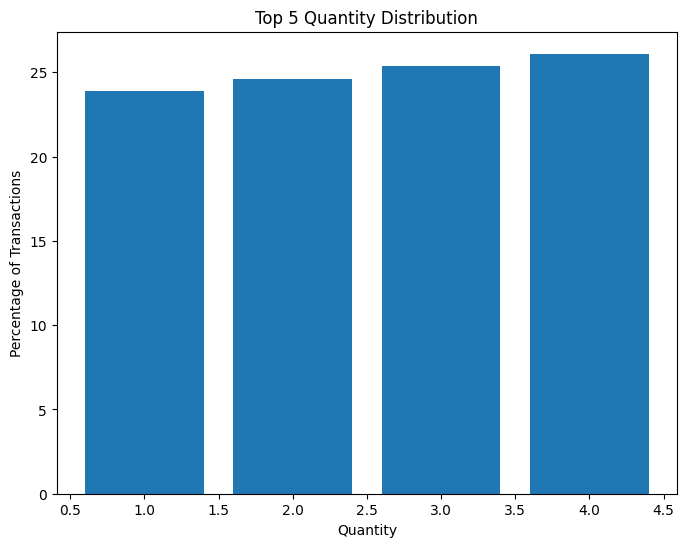

In [34]:
# Visualizing Quantity Distribution (Top 5)
plt.figure(figsize=(8, 6))
plt.bar(quantity_dist.head().index, quantity_dist.head())
plt.xlabel("Quantity")
plt.ylabel("Percentage of Transactions")
plt.title("Top 5 Quantity Distribution")
plt.show()


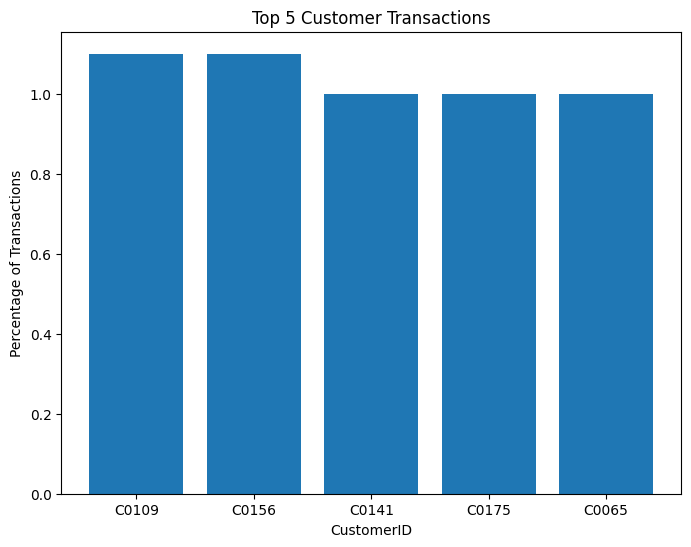

In [35]:
# Visualizing Customer Transactions Distribution (Top 5)
plt.figure(figsize=(8, 6))
plt.bar(customer_transaction_dist.head().index, customer_transaction_dist.head())
plt.xlabel("CustomerID")
plt.ylabel("Percentage of Transactions")
plt.title("Top 5 Customer Transactions")
plt.show()

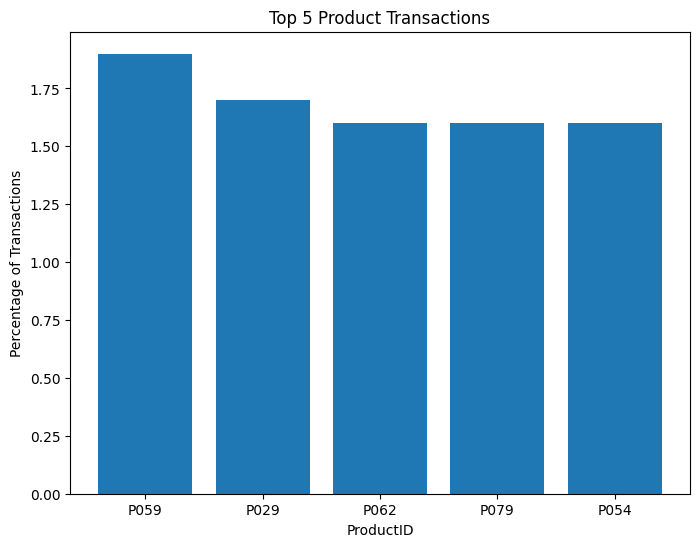

In [36]:
# Visualizing Product Transactions Distribution (Top 5)
plt.figure(figsize=(8, 6))
plt.bar(product_transaction_dist.head().index, product_transaction_dist.head())
plt.xlabel("ProductID")
plt.ylabel("Percentage of Transactions")
plt.title("Top 5 Product Transactions")
plt.show()

**As per as my analysis and visualing those plots , I confirm that this is balanced dataset**

**As per my analysis the below are top 5 findings or top 5  business Insights**

In [43]:
# Top 5 Business Insights calculations

# 1. Top regions by total revenue
# This insight helps identify the regions contributing the most to the company's revenue.
# Understanding top-performing regions can guide resource allocation and marketing efforts.
revenue_by_region = transactions_merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# 2. Top products by sales volume
# This insight identifies the best-selling products in terms of quantity sold.
# Businesses can use this information to optimize inventory and promote these high-demand products further.
top_products = transactions_merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)

# 3. Top customers by total spending
# This insight highlights the most valuable customers based on their total spending.
# Companies can focus on customer retention strategies and offer personalized rewards to these key customers.
top_customers = transactions_merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# 4. Most popular product categories
# This insight helps in understanding which product categories are most preferred by customers.
# Businesses can strategize product expansion and promotion in these popular categories.
popular_categories = transactions_merged.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# 5. Average spending by customer region
# This insight reveals the spending behavior of customers in each region.
# It helps businesses understand regional preferences and tailor pricing strategies accordingly.
avg_spending_by_region = transactions_merged.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)



In [48]:
# Displaying the results
print("Top Regions by Total Revenue:\n", revenue_by_region)

Top Regions by Total Revenue:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [45]:
print("\nTop Products by Sales Volume:\n", top_products)


Top Products by Sales Volume:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [46]:
print("\nTop Customers by Total Spending:\n", top_customers)


Top Customers by Total Spending:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [47]:
print("\nMost Popular Product Categories:\n", popular_categories)


Most Popular Product Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [49]:
print("\nAverage Spending by Customer Region:\n", avg_spending_by_region)



Average Spending by Customer Region:
 Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


**For Better Understanding I just visualing the above insights using different plots**

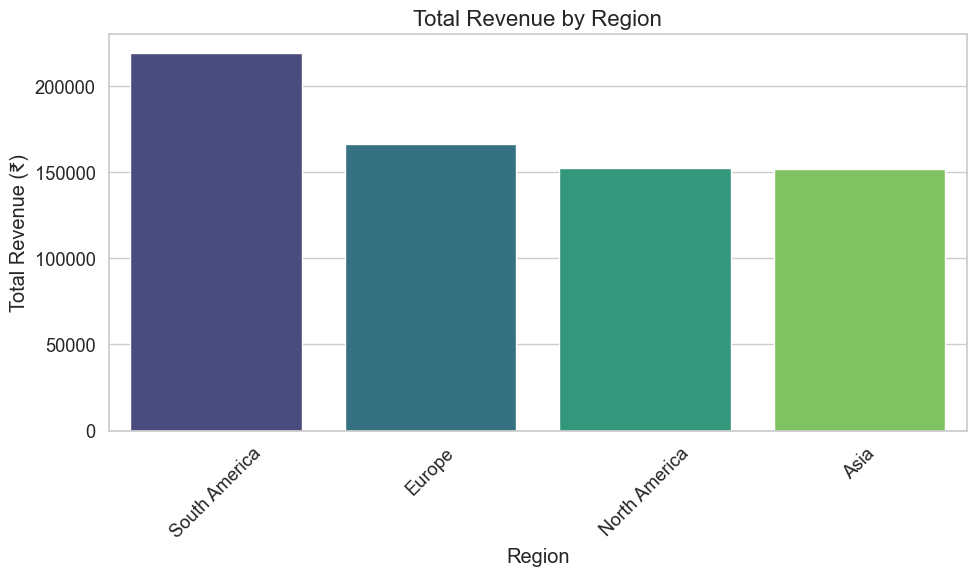

In [60]:
# 1. Total revenue by region
# This plot shows the total revenue contribution from each region.
# Insight: Identifies which regions are driving the most revenue, helping focus efforts on high-performing regions or improving others.
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, hue=revenue_by_region.index, palette="viridis", legend=False)
plt.title("Total Revenue by Region", fontsize=16)
plt.ylabel("Total Revenue (₹)")
plt.xlabel("Region")
plt.xticks(rotation=45)  # Rotating labels for better readability
plt.tight_layout()
plt.show()

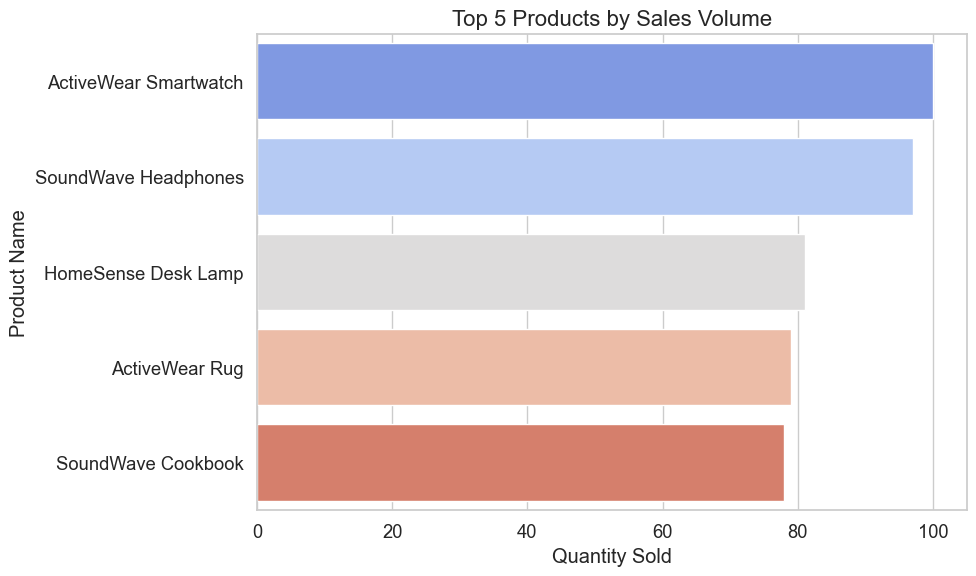

In [67]:
# 2. Top 5 products by sales volume
# This plot shows the top 5 products based on the quantity sold.
# Insight: Helps identify the most popular products by volume, which can inform inventory decisions and marketing campaigns.
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="coolwarm", legend=False)
plt.title("Top 5 Products by Sales Volume", fontsize=16)
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

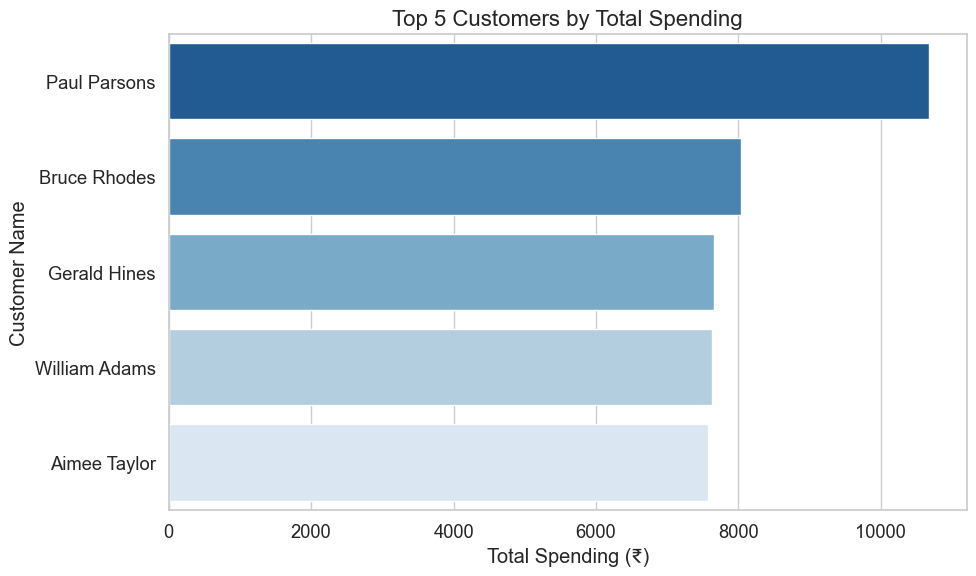

In [68]:
# 3. Top 5 customers by total spending
# This plot shows the top 5 customers based on their total spending.
# Insight: Highlights high-value customers who might be prioritized for retention or loyalty rewards programs.
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.index, palette="Blues_r", legend=False)
plt.title("Top 5 Customers by Total Spending", fontsize=16)
plt.xlabel("Total Spending (₹)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

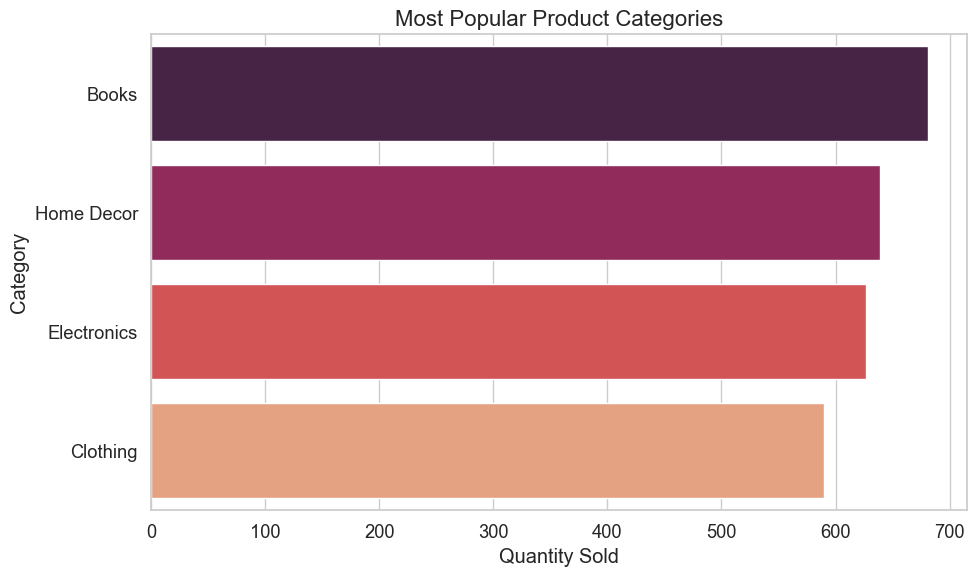

In [69]:
# 4. Most popular product categories
# This plot shows the most purchased product categories based on the total quantity sold.
# Insight: Provides an overview of customer preferences by category, guiding product line focus or diversification strategies.
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_categories.values, y=popular_categories.index, hue=popular_categories.index, palette="rocket", legend=False)
plt.title("Most Popular Product Categories", fontsize=16)
plt.xlabel("Quantity Sold")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


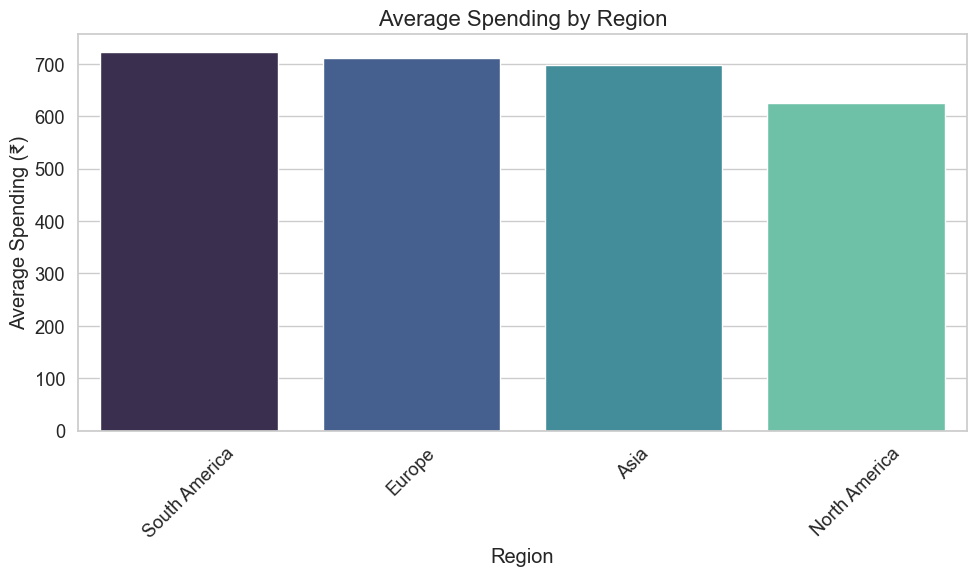

In [71]:
# 5. Average spending by region
# This plot shows the average spending per transaction in each region.
# Insight: Reveals which regions have higher-value transactions, indicating potential for premium marketing efforts or customer targeting.
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spending_by_region.index, y=avg_spending_by_region.values, hue=avg_spending_by_region.index, palette="mako", legend=False)
plt.title("Average Spending by Region", fontsize=16)
plt.ylabel("Average Spending (₹)")
plt.xlabel("Region")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()